##1. Исследование числености популяции Юпитериан

Известно, что у популяции наземных Юпитериан скорость рождения в популяции с низкой численностью зависит от частоты встреч одновременно четерех особей разных полов. При этом при высокой плотности популяции рождаемость определяется встречаемостью двух особей. Данную популяцию непрерывно выедают живущие там же подземные существа, количество которых необходимо принять за параметр U, а выедание пропорционально частоте встреч подземных существ с наземными. Кроме того наземные Юпитериане склонны к самопроизвольной смерти.


Так как у Юпитериан известно 4 пола, в формуле должно быть 4 уравнения для скорости роста популяции особей каждого пола. Обозначим их $x, y, z, w$. Так как никакой пол никак не выделен, то все уравнения будут выглядеть аналогично. Разберем построение уравнения для особей $x$, для остальных уравнений нужно будет только заменять обозначения переменных.

Чтобы учесть скорость рождения в популяции при низкой численности, введем член $axyzw$, $a$ - коэффициент скорости рождаемости при низкой плотности, $xyzw$ отвечает за то, что скорость роста зависит от встречаемости особей всех четырех полов, если нет хотя бы одной особи любого пола, т.е. что-то из $x, y, z, w$ равно $0$, то и рост будет равен нулю.

При высокой плотности скорость роста зависит от встречаемости особей двух полов, для особи пола $x$ нужно учесть встречи с особями пола $y, z, w$. Так как никакой пол не выделен, то и коэффициент скорости роста можно взять один. Это условие дает член $b(x^2y^2 + x^2z^2 + x^2w^2), т.к. при  $x → ∞$ скорость роста будет определяться членом с большей степенью.

Выеданием особей подземными жителями зададим членом $-cUx$. Член, отвечающий за самопроизвольную смерть, по идее надо задать случайной переменной, но для упрощения примем, что скорость самопроизвольной смерти постоянна и равна $d$, тогда этот член будет $-d$



Итоговая система уравнений

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= axyzw + bx^2(y^2 +z^2 + w^2) - cUx - d \\
\frac{dy}{dt} &= axyzw + by^2(x^2 +z^2 + w^2) - cUy - d \\
\frac{dz}{dt} &= axyzw + bz^2(x^2 +y^2 + w^2) - cUz - d \\
\frac{dw}{dt} &= axyzw + bw^2(x^2 +y^2 + y^2) - cUw - d \\
\end{aligned}
\right.
$$

Итоговая система уравнений (урежем)

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= axy + bx^2 y^2 - cUx - d \\
\frac{dy}{dt} &= axy + by^2 x^2 - cUy - d \\
\end{aligned}
\right.
$$

## Задание 
**Для конкретных параметров:**
1. Находите симметричный корень (x=y) с помощью root_scalar
2. Находите матрицу Якоби
3. Находите собственные числа
4. Подставляете в собственные числа root
5. Делаете вывод об устойчивости
6. Нарисовать фазовый портрет 2Д
**Параметрический анализ**

7.  Берете параметр d и делате анализ по шагам 1-4 в зависимости от d. 

Система уравнений получилась нелинейная, мне пока не хватает знаний для того, чтобы исследовать ее.

$$ (x_1, y_1, z_1, w_1) $$

$$ (y_1, x_1, z_1, w_1) $$

$$ 0 = axyzw + bx^2(y^2 +z^2 + w^2) - cUx - d  $$

$$ 0 = ayxzw + by^2(x^2 +z^2 + w^2) - cUy - d  $$

$$ b(x^2-y^2)(y^2 - x^2) - cU(x-y) = 0 $$

$$ -b(x^2 - y^2)^2 = cU (x-y) $$

$$ -b(x-y)^2(x+y)^2 = cU (x-y) $$

$$ (x-y)(x+y)^2 = -cU/b $$

*... можно подумать ...*

$$ 0 = (a+b) x^4 - cUx - d  $$

In [13]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [20]:
a = 2
b = 2
c = 3
U = 10
d = 1
fun = lambda x: (a+b)*x**4 - c*U*x - d
res = opt.root_scalar(fun, x0 = 10, method='brentq', bracket=(0,20) )

In [21]:
res.root

1.9684211234686944

(-25.0, 25.0)

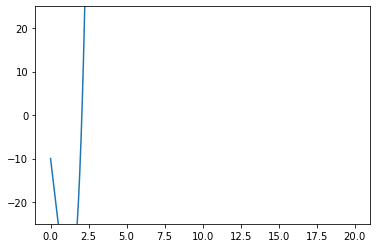

In [18]:
xx = np.linspace(0,20, 1000)
plt.plot(xx, fun(xx))
plt.ylim(-25,25)

In [ ]:
x* = y* = a

## Исследование численности популяции песчаной форели

Для того, чтобы провести экологическую трансформацию Аракиса, Лето второй инициировал планомерное уничтожение песчаной форели. Примите, что форель не размножается, а продуцируется песчанными червями с постоянной скоростью. Уничтожение песчаной форели производится в местах ее скоплений, вероятность встречи с которыми пропорциональна третьей степени количества форелей. Форель способна делиться почкованием. Постройте модель динамики численности песчаной форели.

Примем численность песчаной форели за $x$. Тогда нужно построить дифференциальное уравнений $dx/dt$. 

Так как песчаная форель продуцируется с постоянной скоростью, один из членов уравнения будет $r$, который равен скорости продуцирования. 

Член, отвечающий за уничтожение, равен $-ax^3$

Так как форель способна делиться почкованием, нужно добавить член, зависящий от $x$, то есть $bx$

Итоговая модель 

$$ \frac{dx}{dt} = r + bx - ax^3 $$

Чтобы уменьшить количество параметров, проведем замену переменных:

$$
y =  \frac{x}{r} \\
K = ar^2 \\
\frac{dy}{dt} = 1 + by - Ky^3 
$$